# Mini EDA

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
# open datasets
attendance_df = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/2016-17_-_2020-23_Citywide_End-of-Year_Attendance_and_Chronic_Absenteeism_Data_20250604.csv")
demographic_df = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/2019-20_Demographic_Snapshot_-_Citywide_20250604.csv")
graduation_df = pd.read_csv("/Users/sa10/Downloads/Education-Capstone/data/Graduation_results_for_Cohorts_2012_to_2019__Classes_of_2016_to_2023__20250609.csv")

## Attendance 

In [346]:
attendance_df.head()

,Grade,Category,Year,# Total Days,# Days Absent,# Days Present,% Attendance,# Contributing 10+ Total Days and 1+ Pres Day,# Chronically Absent,% Chronically Absent
0,All Grades,All Students,2018-19,30887,2278,28609,92.6,192,47,24.5
1,All Grades,All Students,2019-20,21101,1500,19601,92.9,204,58,28.4
2,All Grades,All Students,2020-21,32686,3931,28755,88.0,199,84,42.2
3,All Grades,All Students,2021-22,31663,4751,26912,85.0,190,113,59.5
4,All Grades,All Students,2022-23,32663,4159,28504,87.3,206,104,50.5


In [347]:
attendance_df.describe

<bound method NDFrame.describe of             Grade      Category     Year  # Total Days # Days Absent  \
0      All Grades  All Students  2018-19         30887          2278   
1      All Grades  All Students  2019-20         21101          1500   
2      All Grades  All Students  2020-21         32686          3931   
3      All Grades  All Students  2021-22         31663          4751   
4      All Grades  All Students  2022-23         32663          4159   
...           ...           ...      ...           ...           ...   
53602          12  All Students  2018-19         62398         10686   
53603          12  All Students  2019-20         39800          6585   
53604          12  All Students  2020-21         68770         15327   
53605          12  All Students  2021-22         60634         16098   
53606          12  All Students  2022-23         56297         12879   

      # Days Present % Attendance  \
0              28609         92.6   
1              19601       

In [348]:
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53607 entries, 0 to 53606
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Grade                                          53607 non-null  object
 1   Category                                       53607 non-null  object
 2   Year                                           53607 non-null  object
 3   # Total Days                                   53607 non-null  int64 
 4   # Days Absent                                  53607 non-null  object
 5   # Days Present                                 53607 non-null  object
 6   % Attendance                                   53607 non-null  object
 7   # Contributing 10+ Total Days and 1+ Pres Day  53607 non-null  object
 8   # Chronically Absent                           53607 non-null  object
 9   % Chronically Absent                           53607 non-null

In [350]:
column = [col for col in attendance_df.columns if "#" in col or "%" in col]
for col in column:
  attendance_df[col] = pd.to_numeric(attendance_df[col], errors="coerce")
  if "#" in col:
    attendance_df[col] = attendance_df[col].astype("Int64")

In [351]:
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53607 entries, 0 to 53606
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Grade                                          53607 non-null  object 
 1   Category                                       53607 non-null  object 
 2   Year                                           53607 non-null  object 
 3   # Total Days                                   53607 non-null  Int64  
 4   # Days Absent                                  51823 non-null  Int64  
 5   # Days Present                                 51823 non-null  Int64  
 6   % Attendance                                   51823 non-null  float64
 7   # Contributing 10+ Total Days and 1+ Pres Day  51823 non-null  Int64  
 8   # Chronically Absent                           51818 non-null  Int64  
 9   % Chronically Absent                           518

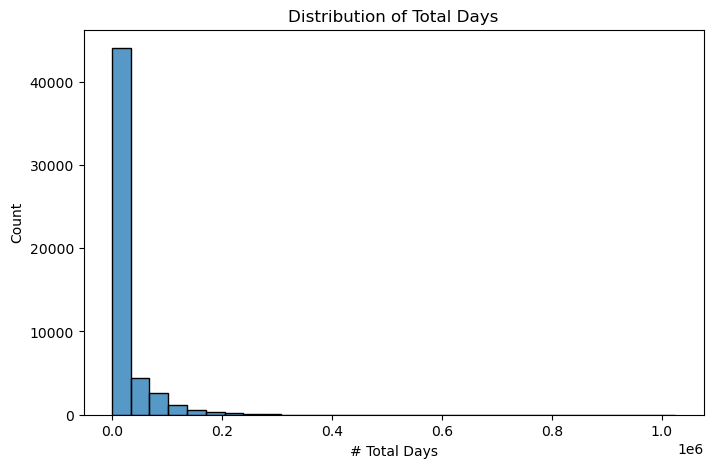

In [352]:
plt.figure(figsize=(8,5))
sns.histplot(data=attendance_df, x="# Total Days", bins=30, kde=False)
plt.title("Distribution of Total Days")
plt.xlabel("# Total Days")
plt.ylabel("Count")
plt.show()

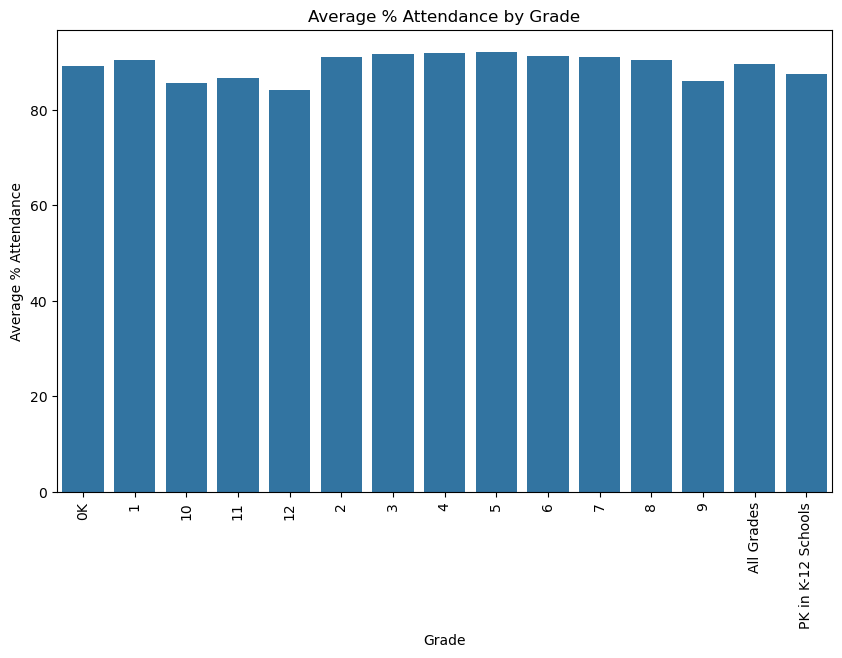

In [353]:
plt.figure(figsize=(10,6))
sns.barplot(data=attendance_df, x="Grade", y="% Attendance", errorbar=None, order=sorted(attendance_df["Grade"].unique()))
plt.title("Average % Attendance by Grade")
plt.xlabel("Grade")
plt.ylabel("Average % Attendance")
plt.xticks(rotation=90)
plt.show()

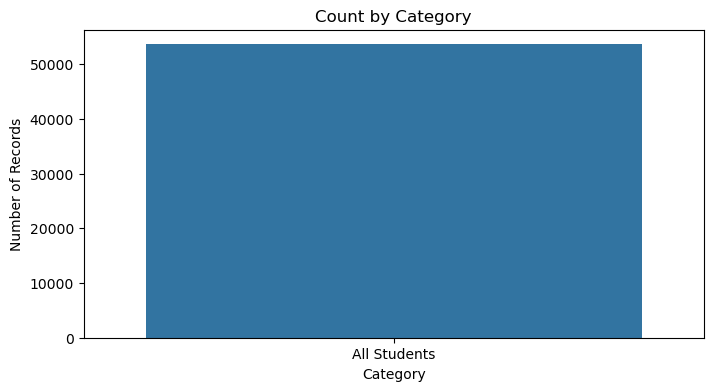

In [354]:
plt.figure(figsize=(8,4))
sns.countplot(data=attendance_df, x="Category")
plt.title("Count by Category")
plt.xlabel("Category")
plt.ylabel("Number of Records")
plt.show()


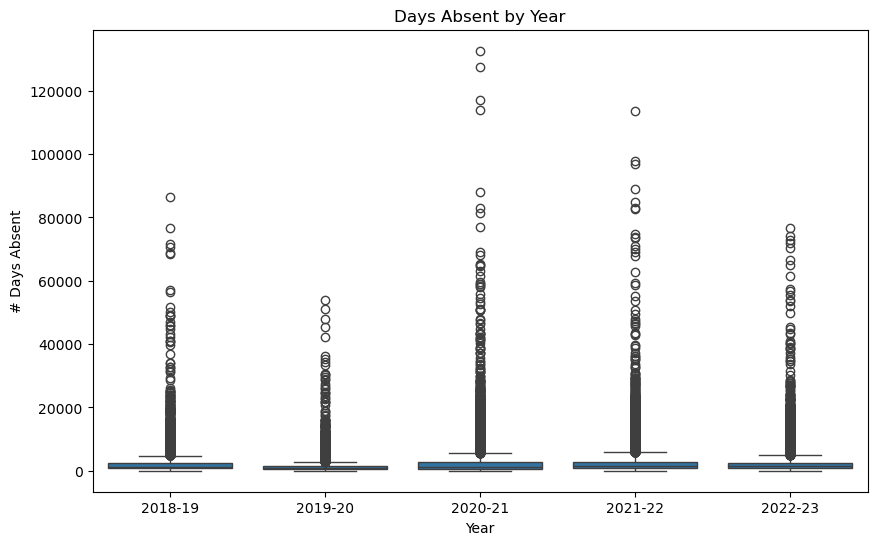

In [427]:
plt.figure(figsize=(10,6))
sns.boxplot(data=attendance_df, x="Year", y="# Days Absent")
plt.title("Days Absent by Year")
plt.xlabel("Year")
plt.ylabel("# Days Absent")
plt.show()


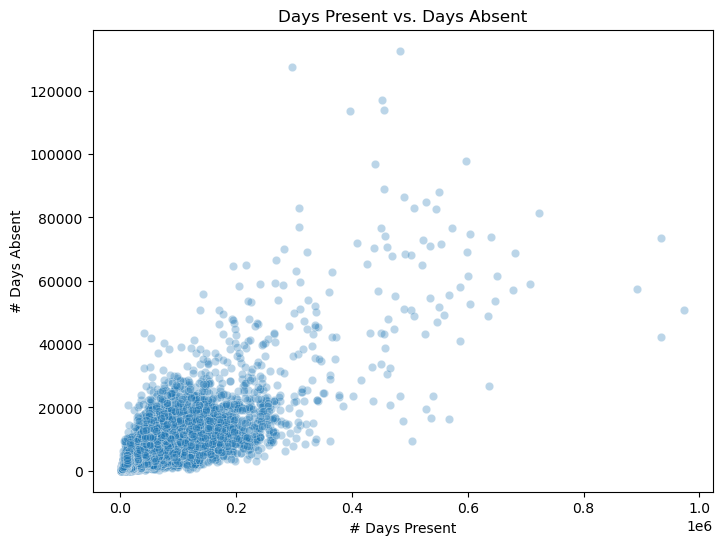

In [356]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=attendance_df, x="# Days Present", y="# Days Absent", alpha=0.3)
plt.title("Days Present vs. Days Absent")
plt.xlabel("# Days Present")
plt.ylabel("# Days Absent")
plt.show()


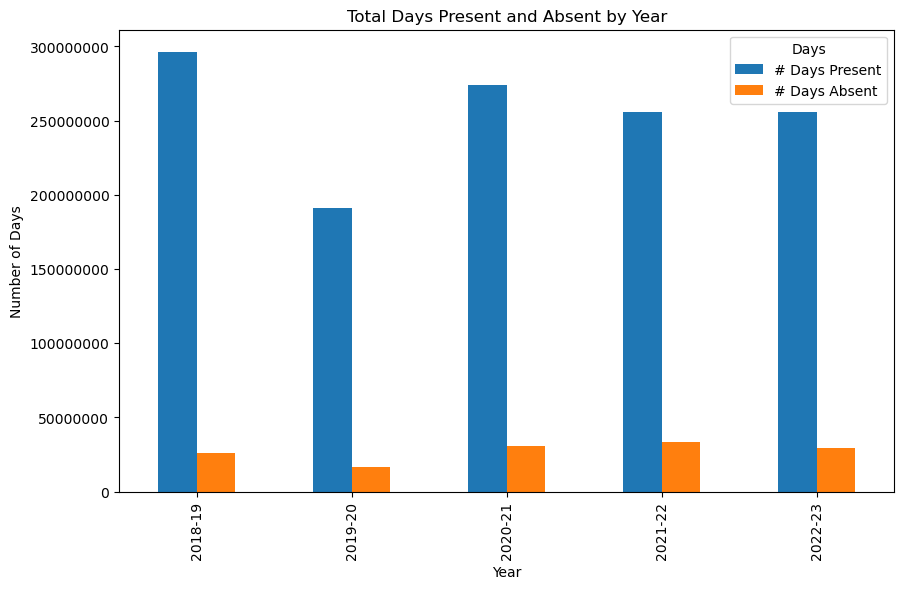

In [ ]:
import matplotlib.ticker as mtick
agg_df = attendance_df.groupby("Year")[["# Total Days", "# Days Absent", "# Days Present"]].sum()
ax = agg_df[["# Days Present", "# Days Absent"]].plot(kind="bar", stacked=False, figsize=(10,6))

# Disable scientific notation on y-axis
ax.yaxis.get_major_formatter().set_scientific(False)

plt.title("Total Days Present and Absent by Year")
plt.xlabel("Year")
plt.ylabel("Number of Days")
plt.legend(title="Days")
plt.show()


In [365]:
attendance_df['Grade'].value_counts()

Grade
All Grades            7666
0K                    4198
1                     4177
2                     4162
5                     4128
3                     4123
4                     4094
PK in K-12 Schools    3383
6                     2864
8                     2667
9                     2642
7                     2611
10                    2319
11                    2291
12                    2282
Name: count, dtype: int64

In [366]:
attendance_df['Year'].value_counts()

Year
2022-23    10855
2021-22    10738
2020-21    10722
2019-20    10665
2018-19    10627
Name: count, dtype: int64

## Demographic 

In [369]:
demographic_df.head()

,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,Grade 6,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,2015-16,1133963,71847,84386,87804,86930,85309,81287,79581,76798,...,0.021,167465,0.148,222496,0.196,142506,0.126,801696,0.707,0.621
1,2016-17,1141232,72553,82517,86008,86279,85050,84185,80563,78985,...,0.023,169803,0.149,228347,0.200,153466,0.134,800985,0.702,0.610
2,2017-18,1135334,71528,81588,83578,83978,84363,83367,83277,79114,...,0.025,170417,0.150,231910,0.204,153661,0.135,856483,0.754,0.719
3,2018-19,1126501,73904,78627,81908,81205,81706,82510,82044,81289,...,0.027,169583,0.151,234497,0.208,148815,0.132,834003,0.740,0.713
4,2019-20,1131868,87480,78587,79171,80298,79555,80287,81513,80250,...,0.031,170370,0.151,230983,0.204,142386,0.126,821883,0.726,0.719


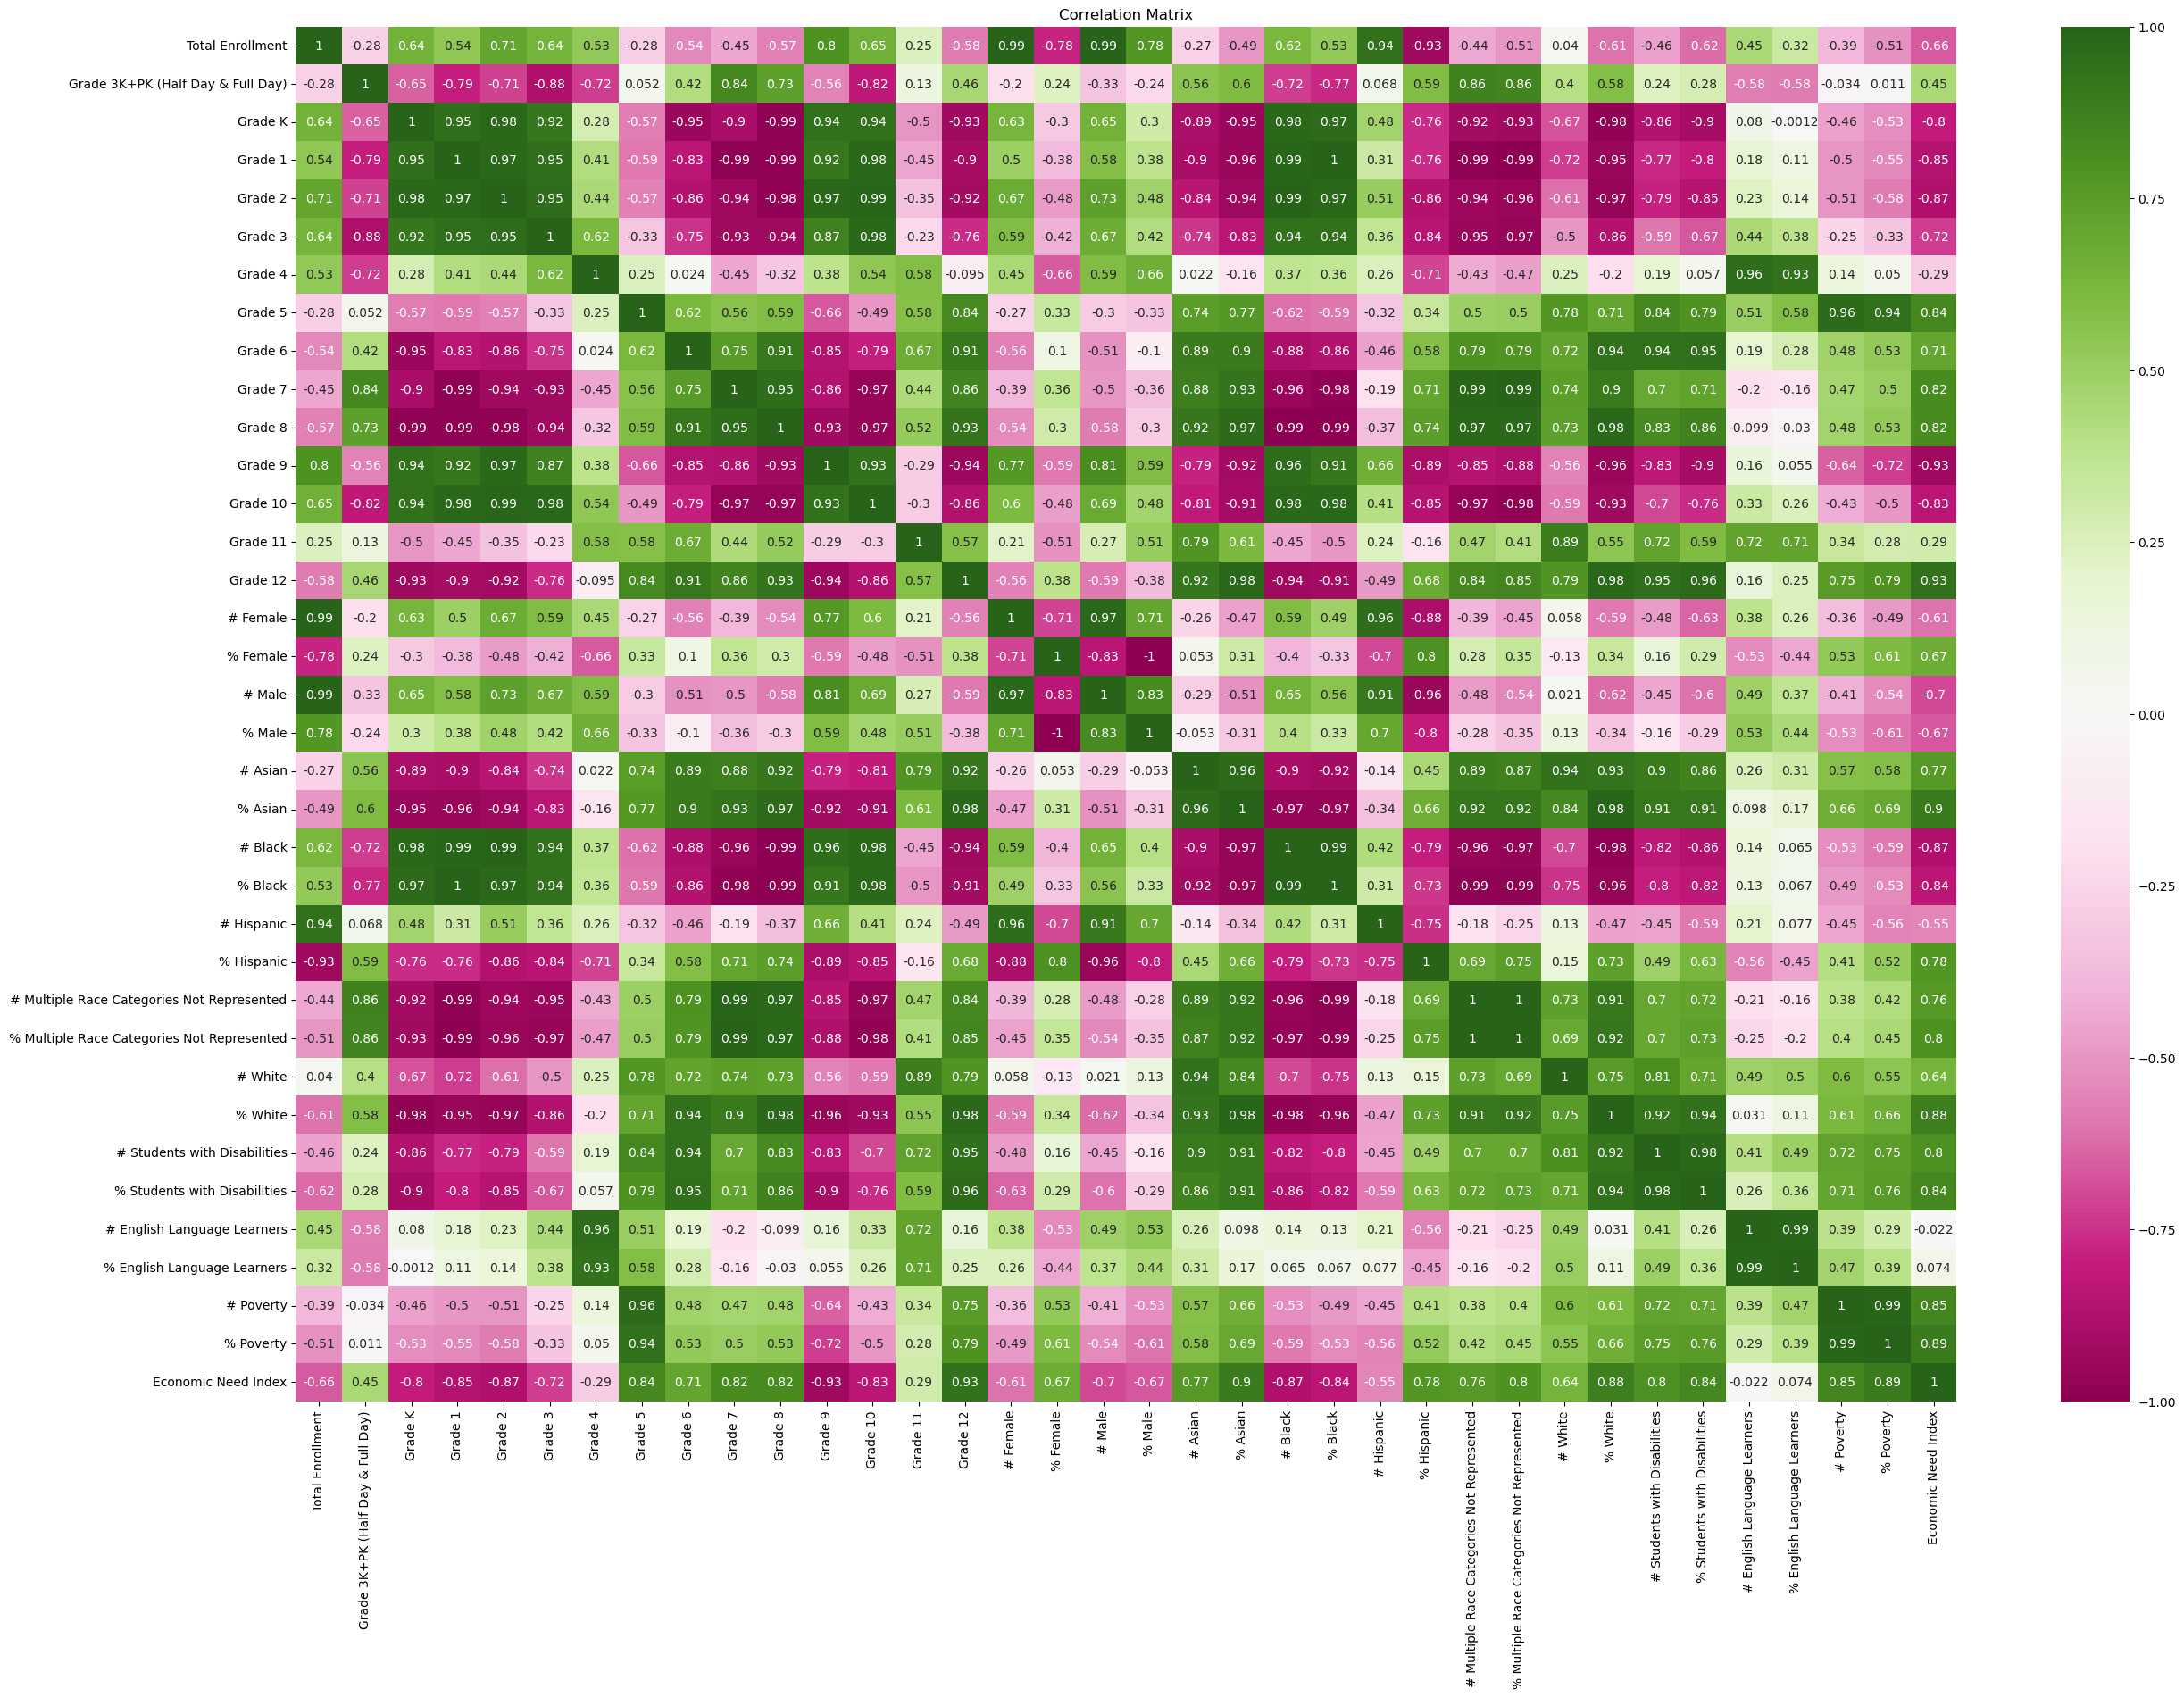

In [370]:
# create heatmap
correlation_matrix = demographic_df.corr(numeric_only=True)
# label and title
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')
plt.title('Correlation Matrix')
# show plot
plt.show()

In [371]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Year                                        5 non-null      object 
 1   Total Enrollment                            5 non-null      int64  
 2   Grade 3K+PK (Half Day & Full Day)           5 non-null      int64  
 3   Grade K                                     5 non-null      int64  
 4   Grade 1                                     5 non-null      int64  
 5   Grade 2                                     5 non-null      int64  
 6   Grade 3                                     5 non-null      int64  
 7   Grade 4                                     5 non-null      int64  
 8   Grade 5                                     5 non-null      int64  
 9   Grade 6                                     5 non-null      int64  
 10  Grade 7           

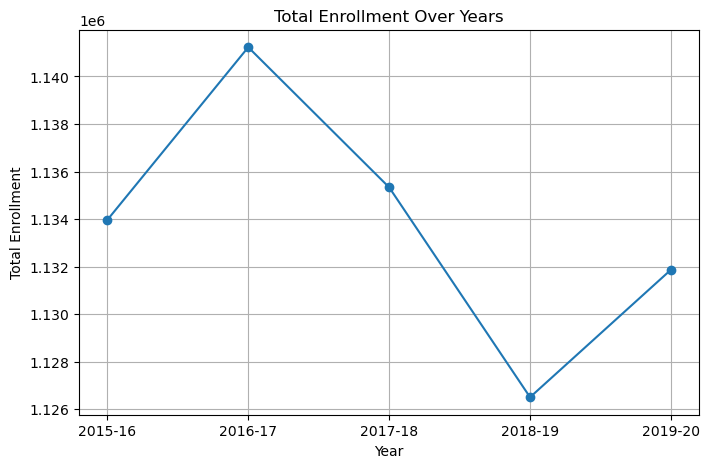

In [430]:
plt.figure(figsize=(8,5))
plt.plot(demographic_df['Year'], demographic_df['Total Enrollment'], marker='o')
plt.title('Total Enrollment Over Years')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.grid(True)
plt.show()

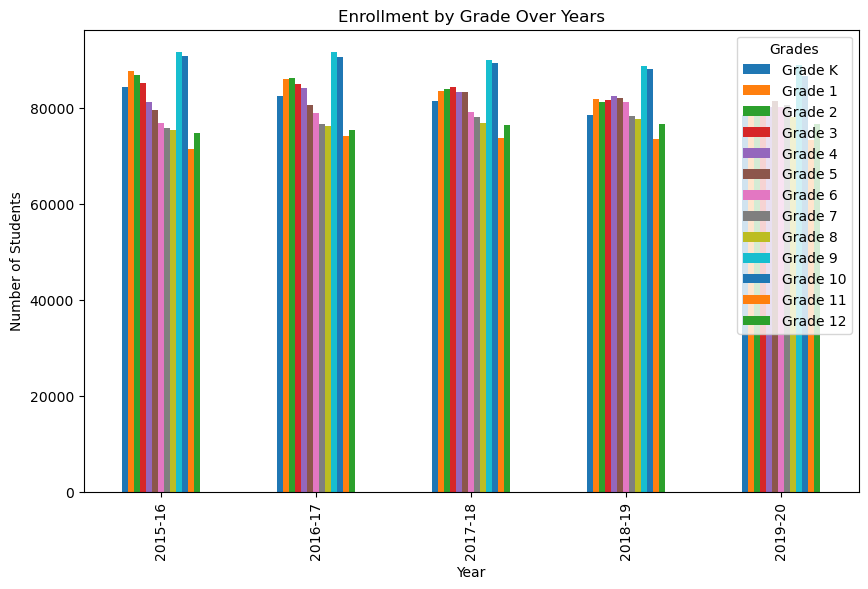

In [435]:
grades = ['Grade K', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5','Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12']

demographic_df.set_index('Year')[grades].plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Enrollment by Grade Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend(title='Grades')
plt.show()


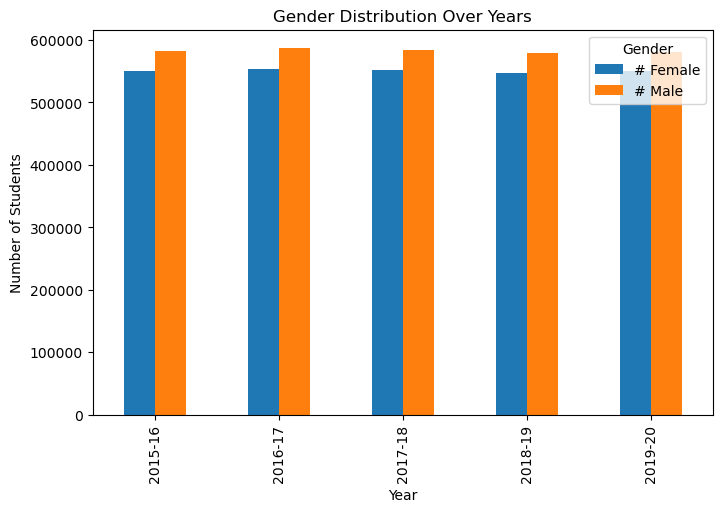

In [374]:
gender_cols = ['# Female', '# Male']

demographic_df.set_index('Year')[gender_cols].plot(kind='bar', stacked=False, figsize=(8,5))
plt.title('Gender Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend(title='Gender')
plt.show()


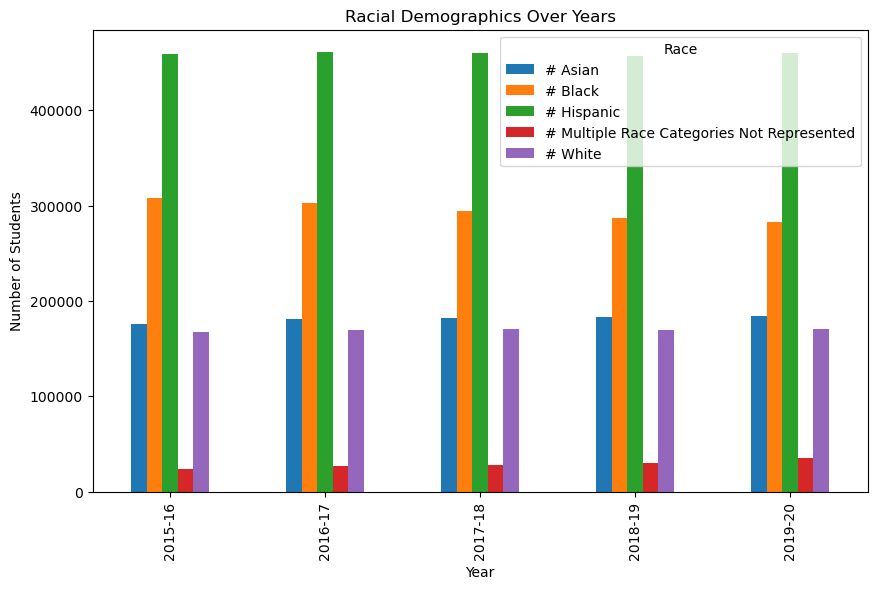

In [375]:
race_cols = ['# Asian', '# Black', '# Hispanic', '# Multiple Race Categories Not Represented', '# White']

demographic_df.set_index('Year')[race_cols].plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Racial Demographics Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.legend(title='Race')
plt.show()


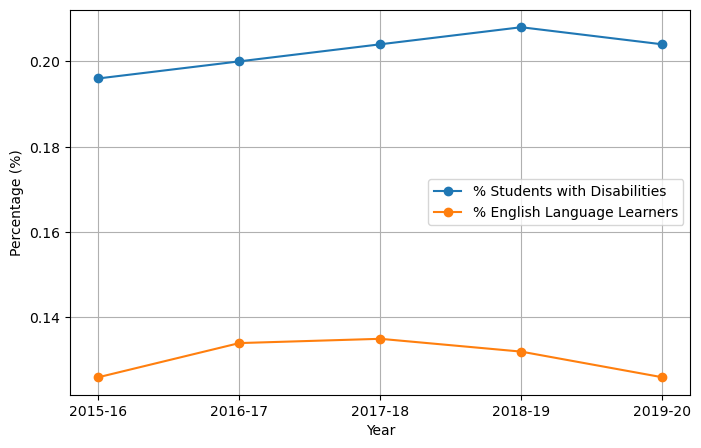

In [431]:
plt.figure(figsize=(8,5))
plt.plot(demographic_df['Year'], demographic_df['% Students with Disabilities'], marker='o', label='% Students with Disabilities')
plt.plot(demographic_df['Year'], demographic_df['% English Language Learners'], marker='o', label='% English Language Learners')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.grid(True)
plt.show()

## Graduation

In [403]:
graduation_df.head()

,Report Category,Geographic Subdivision,School Name,Category,Cohort Year,Cohort,# Total Cohort,# Grads,% Grads,# Total Regents,...,% Local of Cohort,% Local of Grads,# Still Enrolled,% Still Enrolled,# Dropout,% Dropout,# SACC (IEP Diploma),% SACC (IEP Diploma) of Cohort,# TASC (GED),% TASC (GED) of Cohort
0,Citywide,Citywide,NaN,All Students,2019,4 year August,69893,58503,83.7,58295,...,0.3,0.4,6773,9.7,3748,5.4,260,0.4,569,0.8
1,Citywide,Citywide,NaN,All Students,2018,4 year August,70912,59374,83.7,59110,...,0.4,0.4,6808,9.6,3831,5.4,322,0.5,547,0.8
2,Citywide,Citywide,NaN,All Students,2017,4 year August,72663,60055,82.6,59683,...,0.5,0.6,8225,11.3,3545,4.9,227,0.3,566,0.8
3,Citywide,Citywide,NaN,All Students,2016,4 year August,73565,58704,79.8,57734,...,1.3,1.7,9385,12.8,4338,5.9,269,0.4,852,1.2
4,Citywide,Citywide,NaN,All Students,2015,4 year August,73772,57035,77.3,51848,...,7,9.1,9979,13.5,5745,7.8,317,0.4,692,0.9


In [404]:
graduation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Category                       1130 non-null   object 
 1   Geographic Subdivision                1130 non-null   object 
 2   School Name                           0 non-null      float64
 3   Category                              1130 non-null   object 
 4   Cohort Year                           1130 non-null   int64  
 5   Cohort                                1130 non-null   object 
 6   # Total Cohort                        1130 non-null   int64  
 7   # Grads                               1130 non-null   object 
 8   % Grads                               1130 non-null   object 
 9   # Total Regents                       1130 non-null   object 
 10  % Total Regents of Cohort             1130 non-null   object 
 11  % Total Regents o

In [405]:
column = [col for col in graduation_df.columns if "#" in col or "%" in col]
for col in column:
  graduation_df[col] = pd.to_numeric(graduation_df[col], errors="coerce")
  if "#" in col:
    graduation_df[col] = graduation_df[col].astype("Int64")
# Extract the number of years from the Cohort column
graduation_df["Cohort Duration"] = graduation_df["Cohort"].str.extract(r"(\d+)").astype(int)
# Add to Cohort Year to create Graduation Year
graduation_df["Graduation Year"] = graduation_df["Cohort Year"] + graduation_df["Cohort Duration"]

In [406]:
graduation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Category                       1130 non-null   object 
 1   Geographic Subdivision                1130 non-null   object 
 2   School Name                           0 non-null      float64
 3   Category                              1130 non-null   object 
 4   Cohort Year                           1130 non-null   int64  
 5   Cohort                                1130 non-null   object 
 6   # Total Cohort                        1130 non-null   Int64  
 7   # Grads                               1118 non-null   Int64  
 8   % Grads                               1118 non-null   float64
 9   # Total Regents                       1118 non-null   Int64  
 10  % Total Regents of Cohort             1118 non-null   float64
 11  % Total Regents o

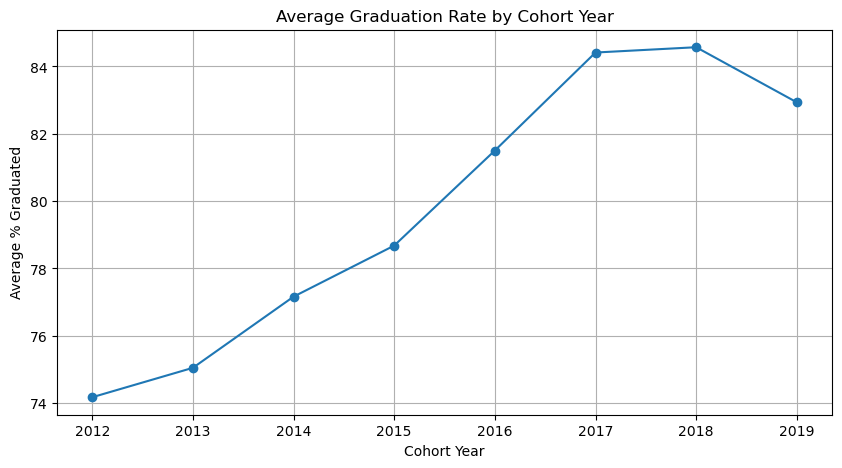

In [407]:
grad_rates = graduation_df.groupby('Cohort Year')['% Grads'].mean()

plt.figure(figsize=(10,5))
grad_rates.plot(kind='line', marker='o')
plt.title('Average Graduation Rate by Cohort Year')
plt.xlabel('Cohort Year')
plt.ylabel('Average % Graduated')
plt.grid(True)
plt.show()

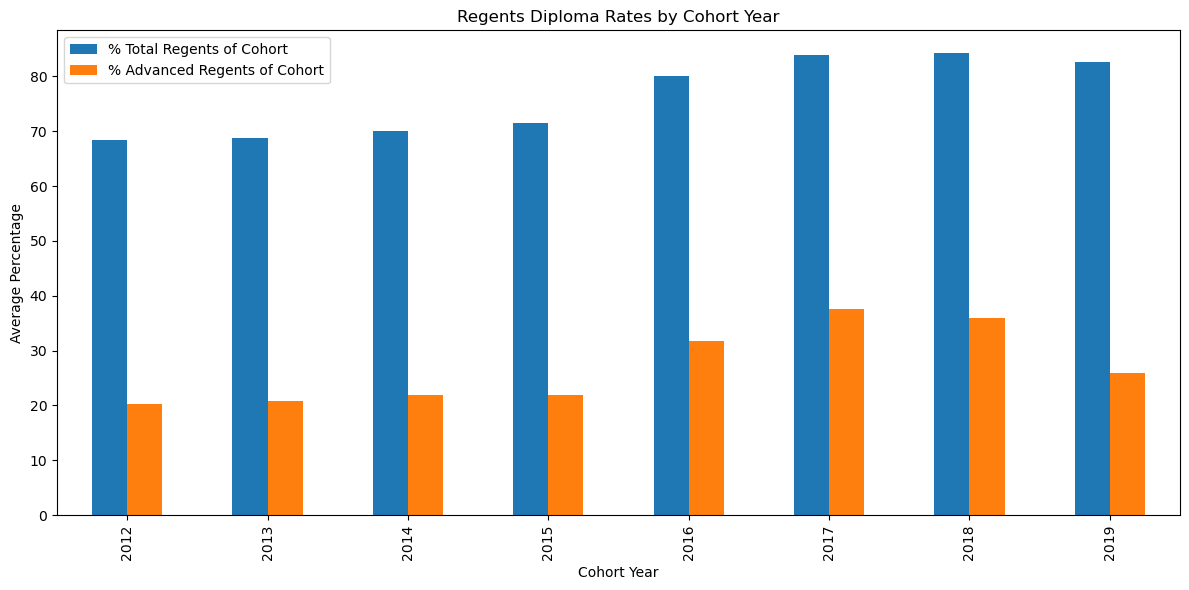

In [408]:
regents_rates = graduation_df.groupby('Cohort Year')[['% Total Regents of Cohort', '% Advanced Regents of Cohort']].mean()

regents_rates.plot(kind='bar', figsize=(12,6))
plt.title('Regents Diploma Rates by Cohort Year')
plt.xlabel('Cohort Year')
plt.ylabel('Average Percentage')
plt.legend(['% Total Regents of Cohort', '% Advanced Regents of Cohort'])
plt.tight_layout()
plt.show()

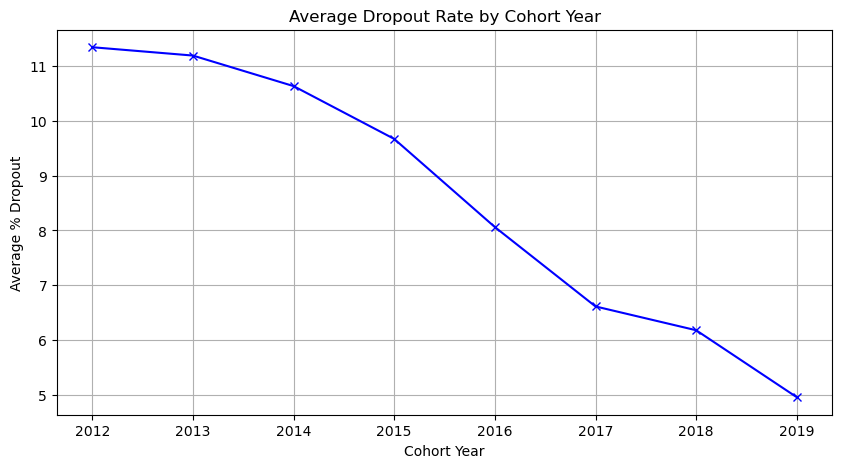

In [433]:
dropout_rates = graduation_df.groupby('Cohort Year')['% Dropout'].mean()

plt.figure(figsize=(10,5))
dropout_rates.plot(kind='line', marker='x', color='blue')
plt.title('Average Dropout Rate by Cohort Year')
plt.xlabel('Cohort Year')
plt.ylabel('Average % Dropout')
plt.grid(True)
plt.show()


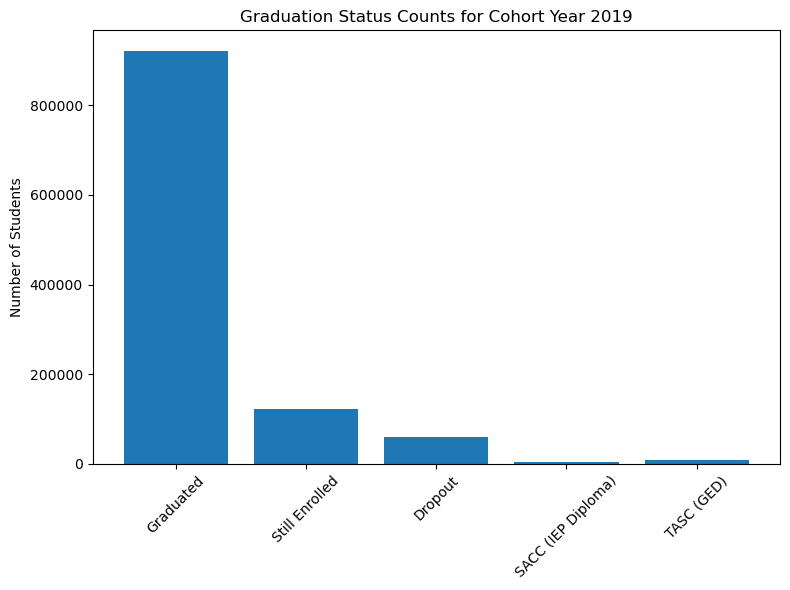

In [428]:
year = 2019
data_2019 = graduation_df[graduation_df['Cohort Year'] == year]

counts = {
    'Graduated': data_2019['# Grads'].sum(),
    'Still Enrolled': data_2019['# Still Enrolled'].sum(),
    'Dropout': data_2019['# Dropout'].sum(),
    'SACC (IEP Diploma)': data_2019['# SACC (IEP Diploma)'].sum(),
    'TASC (GED)': data_2019['# TASC (GED)'].sum()
}

plt.figure(figsize=(8,6))
plt.bar(counts.keys(), counts.values())
plt.title(f'Graduation Status Counts for Cohort Year {year}')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [421]:
graduation_df['Category'].value_counts()

Category
All Students                            36
Male                                    36
Econ Disadv                             36
Male White                              36
Male Native American                    36
Male Multi-Racial                       36
Male Hispanic                           36
Male Black                              36
Male Asian                              36
Female White                            36
Female Native American                  36
Female Multi-Racial                     36
Female Hispanic                         36
Female Black                            36
ELL                                     36
Female Asian                            36
Female                                  36
SWD                                     36
Former ELL                              36
Not ELL                                 36
Current ELL                             36
Ever ELL                                36
Not SWD                                 36
Ne

In [422]:
graduation_df['Cohort'].value_counts()

Cohort
4 year August    253
4 year June      253
5 year August    219
5 year June      219
6 year June      186
Name: count, dtype: int64

In [423]:
graduation_df['Cohort Year'].value_counts()

Cohort Year
2017    155
2016    155
2015    155
2014    155
2013    155
2012    155
2018    128
2019     72
Name: count, dtype: int64

In [424]:
graduation_df['Geographic Subdivision'].value_counts()

Geographic Subdivision
Citywide    1130
Name: count, dtype: int64

In [425]:
graduation_df['Report Category'].value_counts()

Report Category
Citywide    1130
Name: count, dtype: int64